In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("train.csv")
df = df.astype({"Pclass":"str"})
df = df.replace({"Pclass" : {"1":"1st", "2":"2nd", "3":"3nd"}})
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3nd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3nd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3nd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2nd,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1st,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3nd,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1st,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
#전처리
df_selected = df[{"Survived", "Age", "Parch", "SibSp", "Fare", "Pclass", "Sex", "Embarked"}].dropna()

#Age와 Fare 정규화
df_selected["Age"] = (df_selected["Age"] - df_selected["Age"].mean())/df_selected["Age"].std() #normalize
df_selected["Fare"] = (df_selected["Fare"] - df_selected["Fare"].mean())/df_selected["Age"].std() #normalize

#Label Encoding 방식 변환
# df_selected["Sex_number"] = df_selected["Sex"].replace("female", 1).replace("male", 2)
# df_selected["Embarked_number"] = df_selected["Embarked"].replace("C", 1).replace("Q", 2).replace("S", 3)

#One hot encoding 방식 변환
df_one_hot_encoded = pd.get_dummies(df[{"Pclass", "Sex", "Embarked", "Cabin"}])

df_selected = pd.merge(df_selected[{"Survived", "Age", "Parch", "SibSp", "Fare"}], df_one_hot_encoded, how="left", left_index=True, right_index=True)

display(df_selected)

,Parch,Fare,Survived,SibSp,Age,Embarked_C,Embarked_Q,Embarked_S,Cabin_A10,Cabin_A14,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_1st,Pclass_2nd,Pclass_3nd,Sex_female,Sex_male
0,0,-27.317251,0,1,-0.527298,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,36.716049,1,1,0.576688,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,-26.642251,1,0,-0.251301,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,18.532749,1,1,0.369691,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,-26.517251,0,0,0.369691,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,5,-5.442251,0,0,0.645688,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
886,0,-21.567251,0,0,-0.182302,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
887,0,-4.567251,1,0,-0.734295,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
889,0,-4.567251,1,0,-0.251301,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [54]:
#데이터셋 분리
x = df_selected.drop("Survived", axis=1)
y = df_selected["Survived"]
display(x)
display(y)

,Parch,Fare,SibSp,Age,Embarked_C,Embarked_Q,Embarked_S,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_1st,Pclass_2nd,Pclass_3nd,Sex_female,Sex_male
0,0,-27.317251,1,-0.527298,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,36.716049,1,0.576688,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,-26.642251,0,-0.251301,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,18.532749,1,0.369691,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,-26.517251,0,0.369691,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,5,-5.442251,0,0.645688,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
886,0,-21.567251,0,-0.182302,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
887,0,-4.567251,0,-0.734295,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
889,0,-4.567251,0,-0.251301,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

<AxesSubplot:>

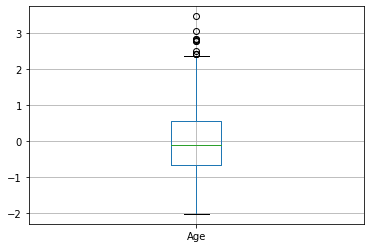

In [41]:
x.boxplot(column="Age")

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=34)

display(x_train)
display(y_train)

,Parch,Fare,SibSp,Age,Embarked_C,Embarked_Q,Embarked_S,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_1st,Pclass_2nd,Pclass_3nd,Sex_female,Sex_male
37,0,-26.517251,0,-0.596297,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
566,0,-26.671451,0,-0.734295,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
383,0,17.432749,1,0.369691,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
510,0,-26.817251,0,-0.044304,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
865,0,-21.567251,0,0.852685,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,0,-18.717251,1,-0.113303,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
111,0,-20.113051,1,-1.044791,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
622,1,-18.825551,1,-0.665296,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
152,0,-26.517251,0,1.784174,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


37     0
566    0
383    1
510    1
865    1
      ..
403    0
111    0
622    1
152    0
526    1
Name: Survived, Length: 640, dtype: int64

In [63]:
ml = SVC(kernel="linear", C=1.0, random_state=0)
ml.fit(x_train, y_train)
y_pred = ml.predict(x_test)
print("SVM 총 테스트 갯수 : %d, 오류 갯수 : %d" %(len(y_test), (y_test != y_pred).sum()))
print("SVM 정확도 %.2f" %accuracy_score(y_test, y_pred))

SVM 총 테스트 갯수 : 72, 오류 갯수 : 14
SVM 정확도 0.81


In [60]:
clf = LogisticRegression(solver='lbfgs').fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Logistic 총 테스트 갯수 : %d, 오류 갯수 : %d" %(len(y_test), (y_test != y_pred).sum()))
print("Logistic 정확도 %.2f" %accuracy_score(y_test, y_pred))

Logistic 총 테스트 갯수 : 72, 오류 갯수 : 14
Logistic 정확도 0.81


c:\users\poscouser\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
